      Plot_Target1  Plot_Target2  Plot_Target3  Attack_Preparation  \
0              7.0           6.0          14.0                 1.0   
1              7.0           6.0          14.0                 1.0   
2              4.0           6.0          14.0                 0.0   
3              7.0           6.0          14.0                 1.0   
4              7.0           6.0          14.0                 1.0   
...            ...           ...           ...                 ...   
2221          14.0           6.0          14.0                 1.0   
2222          15.0           6.0          14.0                 2.0   
2223          14.0           6.0          14.0                 0.0   
2224          14.0           6.0          14.0                 2.0   
2225           8.0           6.0          14.0                 2.0   

      Op_Security  Changing_Target  Anticp_Fatals_Targ  Internet_Use_Plot  \
0             1.0              0.0                 1.0                0.0   
1    

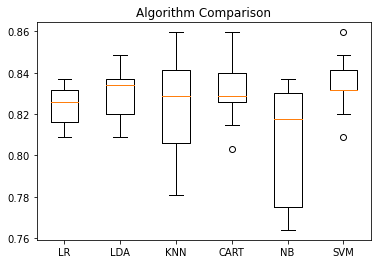

0.8295964125560538
[[  0  26   1]
 [  0 361   3]
 [  0  46   9]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        27
         1.0       0.83      0.99      0.91       364
         2.0       0.69      0.16      0.26        55

    accuracy                           0.83       446
   macro avg       0.51      0.39      0.39       446
weighted avg       0.77      0.83      0.77       446



/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data split and cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# evalutions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset and define features
url = "PIRUS_May2020/PIRUS_Public_May2020.csv"
dataset = pd.read_csv(url)

#filtering attributes and values to select what are needed
plot_consequences = dataset.iloc[:, 6:20]
known_values = np.logical_and(plot_consequences[:] != -99, plot_consequences[:] != -88)
valid = plot_consequences[known_values]

for col in valid:
    valid[col] = valid[col].replace(np.NaN, valid[col].median())
print(valid)

# Split-out validation dataset to a 8:2 ratio. 80% for training, 20% for testing
array = valid.values
print(array)
X = array[:,0:4]
y = array[:,4]
# print(X)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# Spot Check Algorithms - compare different models to pick the best model
# does not need to be included in the final model
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))